In [48]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_regression

In [49]:
X,y,cof=make_regression(n_samples=601,n_features=1,bias=20,noise=2.1,coef=True)
print(X.shape)
print(y.shape)
print(cof)

(601, 1)
(601,)
62.93257553679453


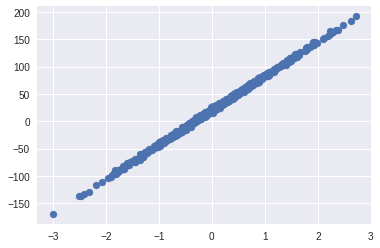

In [50]:
sns.plt.scatter(X[:,0],y)

In [51]:
split = int(0.8 * X.shape[0])

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

print (X_train.shape, X_test.shape)
print (y_train.shape, y_test.shape)

(480, 1) (121, 1)
(480,) (121,)


In [52]:
def hypo(x,w):
    return(x*w[1]+w[0])

def error(y_true,x,w):
    er=0
    
    m=x.shape[0]
    for i in range(m):
        er+=((y_true[i]-hypo(x[i],w))**2)
    er/=(2*m)
    return er

def grad(y_true,x,w):
    gr0=0
    gr1=0
    
    m=x.shape[0]
    
    for i in range(m):
        gr0+=(y_true[i]-hypo(x[i],w))*-1
        gr1+=(y_true[i]-hypo(x[i],w))*(-1*x[i])
    
    gr0/=m
    gr1/=m
    
    return [gr0,gr1]

def grades(y_true,x,w,lrate=0.1):
    eror=error(y_true,x,w)
    [gr0,gr1]=grad(y_true,x,w)
    
    w[0]-=gr0*lrate
    w[1]-=gr1*lrate
    
    return eror,w

In [57]:
W=np.array([0.1,0.1])
loss=[]

In [59]:
for i in range(100):
    l, W = grades(y_train,X_train, W, lrate=0.1)
    loss.append(l)
print(loss)

[array([ 2204.16365876]), array([ 1776.35047026]), array([ 1432.2820674]), array([ 1155.45535173]), array([ 932.63851176]), array([ 753.2192793]), array([ 608.68360025]), array([ 492.19852712]), array([ 398.27841743]), array([ 322.51773347]), array([ 261.37709981]), array([ 212.01195761]), array([ 172.13529691]), array([ 139.90765779]), array([ 113.84895761]), array([ 92.76779201]), array([ 75.70472914]), array([ 61.88681271]), array([ 50.69104619]), array([ 41.61507529]), array([ 34.25364134]), array([ 28.27966285]), array([ 23.42902994]), array([ 19.48837821]), array([ 16.28525452]), array([ 13.6802034]), array([ 11.56039659]), array([ 9.83450238]), array([ 8.42855196]), array([ 7.28260736]), array([ 6.34807446]), array([ 5.58553515]), array([ 4.9629975]), array([ 4.45448275]), array([ 4.03888366]), array([ 3.69904165]), array([ 3.4210005]), array([ 3.19340248]), array([ 3.00699947]), array([ 2.85425698]), array([ 2.72903327]), array([ 2.62631917]), array([ 2.542027]), array([ 2.4728

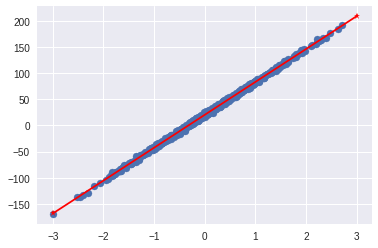

In [61]:

sns.plt.scatter(X[:, 0], y)
y_0 = hypo(-3, W)
y_1 = hypo(3, W)

plt.plot([-3, 3], [y_0, y_1], 'r*-')
plt.show()

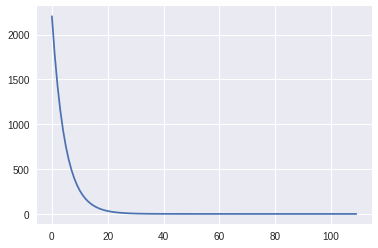

In [60]:
plt.plot(loss)